## Observations and Insights 

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results,on="Mouse ID",how='outer')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_count=len(merged_df['Mouse ID'].unique())
print(f'The number of mice in merged DataFrame is {merged_count}')

The number of mice in merged DataFrame is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df["Duplicates"]=merged_df.duplicated(['Mouse ID','Timepoint'])
duplicates_list=(merged_df.loc[merged_df['Duplicates']==True, ['Mouse ID']])['Mouse ID'].unique()
duplicates_df=pd.DataFrame({"Duplicated mice ID":duplicates_list})
duplicates_df

,Duplicated mice ID
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df=merged_df.loc[merged_df['Mouse ID']==duplicates_list[0],['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=merged_df.loc[merged_df['Mouse ID']!=duplicates_list[0],['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df_count=len(cleaned_df['Mouse ID'].unique())
print(f'The number of mice in the clean DataFrame is {cleaned_df_count}')

The number of mice in the clean DataFrame is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats_df=cleaned_df[['Mouse ID','Drug Regimen','Weight (g)','Sex','Timepoint','Tumor Volume (mm3)']].copy()

grouped_stats_df=stats_df.groupby(['Drug Regimen'])

stats_mean=grouped_stats_df['Tumor Volume (mm3)'].mean()
stats_median=grouped_stats_df['Tumor Volume (mm3)'].median()
stats_var=grouped_stats_df['Tumor Volume (mm3)'].var()
stats_std=grouped_stats_df['Tumor Volume (mm3)'].std()
stats_sem=grouped_stats_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
stats_output_df=pd.DataFrame({'Tumor Volume (mm3) mean':stats_mean, 'Tumor Volume (mm3) median':stats_median,
                           'Tumor Volume (mm3) variance':stats_var,'Tumor Volume (mm3) standard deviation':stats_std,
                          'Tumor Volume (mm3) sem':stats_sem})
stats_output_df

,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance,Tumor Volume (mm3) standard deviation,Tumor Volume (mm3) sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_table = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

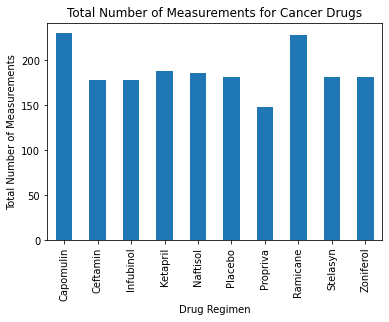

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
stats_count=grouped_stats_df['Tumor Volume (mm3)'].count()
stats_count.plot(kind='bar',xlabel="Drug Regimen", ylabel="Total Number of Measurements",
              title="Total Number of Measurements for Cancer Drugs")
plt.show()

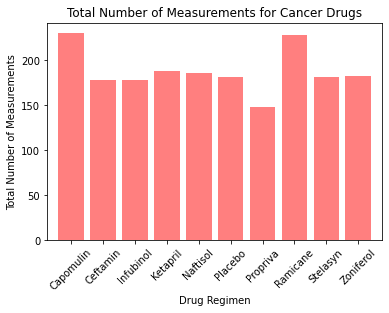

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=np.arange(stats_count.count())
plt.bar(x_axis, stats_count,color='red',alpha=0.5,align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, stats_count.keys(), rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Total Number of Measurements for Cancer Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

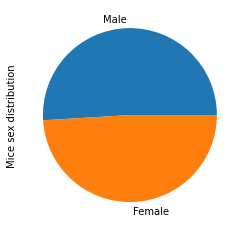

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_list=stats_df["Sex"].value_counts()
sex_list.plot(kind='pie',ylabel='Mice sex distribution')
plt.show()

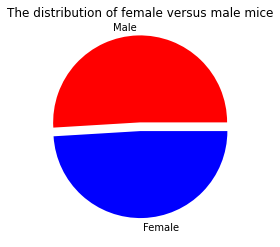

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_list,explode=[0.1,0],labels=sex_list.keys(), colors=["red","blue"])
plt.title("The distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
qob_df=stats_df.loc[(stats_df['Drug Regimen']=='Capomulin')|(stats_df['Drug Regimen']=='Ramicane')|
                 (stats_df['Drug Regimen']=='Infubinol')|(stats_df['Drug Regimen']=='Ceftamin'), ['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
# Start by getting the last (greatest) timepoint for each mouse
grouped_qob_df=qob_df.groupby(['Mouse ID'])
last_timepoint=grouped_qob_df['Timepoint'].max()
last_timepoint_df=pd.DataFrame({"Timepoint":last_timepoint})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df=pd.merge(last_timepoint_df,qob_df, on=["Mouse ID",'Timepoint'])
final_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=final_tumor_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=final_tumor_df.groupby("Drug Regimen")['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
quartiles = tumor_vol.quantile([.25,.75])
    
# add subset
outliers_df=pd.DataFrame({})
qualified_df=pd.DataFrame({})

# Determine outliers using upper and lower bounds
for treatment in treatments:
    iqr=quartiles[treatment][0.75]-quartiles[treatment][0.25]
    lower_bound= 2.5*quartiles[treatment][0.25] - 1.5*quartiles[treatment][0.75]
    upper_bound= 2.5*quartiles[treatment][0.75]- 1.5*quartiles[treatment][0.25]
    mono_outlier_df=final_tumor_df.loc[(final_tumor_df["Drug Regimen"]==treatment) & (
        (final_tumor_df["Tumor Volume (mm3)"]>upper_bound)|(final_tumor_df["Tumor Volume (mm3)"]<lower_bound))]
    mono_qualified_df=final_tumor_df.loc[(final_tumor_df["Drug Regimen"]==treatment) & (
        (final_tumor_df["Tumor Volume (mm3)"]<=upper_bound)&(final_tumor_df["Tumor Volume (mm3)"]>=lower_bound))]
    outliers_df=pd.concat([outliers_df,mono_outlier_df])
    qualified_df=pd.concat([qualified_df,mono_qualified_df])    
    
outliers_df    

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
15,c326,5,Infubinol,36.321346


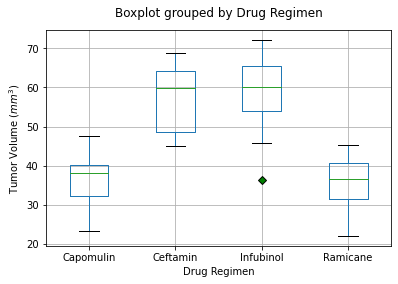

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='g', marker='D')
final_tumor_df.boxplot(column='Tumor Volume (mm3)',by=('Drug Regimen'),flierprops=green_diamond)

plt.title("")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume ($mm^3$)")
plt.show()

## Line and Scatter Plots

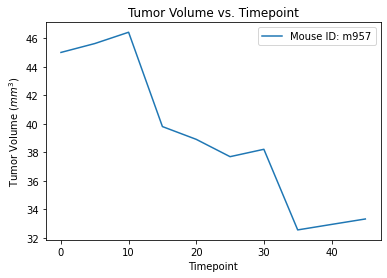

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# find the ramdon mouse that treated with Capomulin
sample_mouse_df=(qualified_df.loc[qualified_df['Drug Regimen']=='Capomulin']).sample()
sample_mouse_id=sample_mouse_df.iloc[0,0]
# Gather the data associated with the mouse of interests
capomulin_sample_df=stats_df.loc[(stats_df['Mouse ID']==sample_mouse_id)].copy()
capomulin_sample_df.plot('Timepoint','Tumor Volume (mm3)',kind='line',ylabel="Tumor Volume ($mm^3$)",
              title="Tumor Volume vs. Timepoint",label=f'Mouse ID: {sample_mouse_id}')
plt.show()

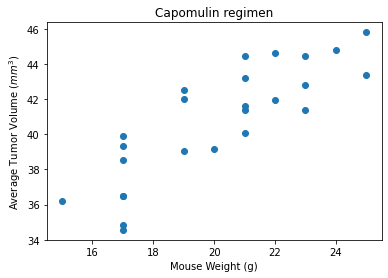

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df=stats_df.loc[(stats_df['Drug Regimen']=='Capomulin')].copy()
grouped_capomulin_df=capomulin_df.groupby(['Mouse ID'])
weight_mean=grouped_capomulin_df['Weight (g)'].mean()
tumor_volume_mean=grouped_capomulin_df['Tumor Volume (mm3)'].mean()
plt.scatter(weight_mean,tumor_volume_mean)
plt.title("Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume ($mm^3$)")
plt.show()

## Correlation and Regression

The r-squared is: 0.7089


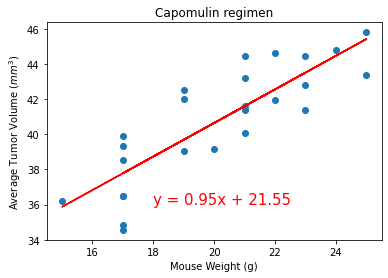

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=weight_mean.values
y_values=tumor_volume_mean.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.title("Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume ($mm^3$)")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()